In [1]:
import numpy as np
import torch
from train_glm import train_glm
import matplotlib.pyplot as plt

# Train

In [2]:
base_dir = "/media/hdd01/sklee/"
experiment = "clust8-30"
cell_type = "CA1"

E_neural_file = "Espikes_neural.npy"
I_neural_file = "Ispikes_neural.npy"
V_file = "vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.7_gB1.2_Er1_Ir7.5_random_NR_rep16_stimseed1.npy"
C_syn_e_file = "handsub11_C_syn_e.npy"
C_syn_i_file = "handsub11_C_syn_i.npy"
C_den_file = "handsub11_C_den.npy"


E_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+E_neural_file)
I_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+I_neural_file)
V = np.load(base_dir+cell_type+"_"+experiment+"/data/"+V_file)[:,:10000].flatten()
C_syn_e = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_e_file)
C_syn_i = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_i_file)
C_den = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_den_file)

E_neural = torch.from_numpy(E_neural)
I_neural = torch.from_numpy(I_neural)
C_syn_e = torch.from_numpy(C_syn_e)
C_syn_i = torch.from_numpy(C_syn_i)
V = torch.from_numpy(V)
C_den = torch.from_numpy(C_den)

In [3]:
model_type = "alpha_hist"
T_train = 65000
T_test = 15000
T_no = 150
save_dir = base_dir+cell_type+"_"+experiment+"/"
device = torch.device("cuda")
sparse_no = 0

if model_type == "alpha":
    batch_size = 60000
    iter_no = 10000
    epoch_no = 5
    lr = 0.003
elif model_type == "alpha_cos":
    batch_size = 2500
    iter_no = 20000
    epoch_no = 5
    lr = 0.0007
elif model_type == "alpha_hist":
    batch_size = 2500
    iter_no = 10000
    epoch_no = 5
    lr = 0.0025

In [ ]:
train_glm(model_type, V, E_neural, I_neural, T_train, T_test,
                T_no, batch_size, iter_no, epoch_no, C_den, C_syn_e, C_syn_i, 
                sparse_no, device, lr, save_dir)

0 -5.304985634335679e-06 0.9594646698319929 0.00012449183850549161
50 0.003042103434672039 1.1906994826883741 0.00014895261847414076
100 -4.451128702043228e-05 6.341156941006144 0.00015612790593877435
150 0.014076315283745644 6.729287947792776 0.00011649038788164034
200 0.0954722225912803 1.7264067601246782 0.00026659187278710306
250 0.0642032088447766 1.016344399974519 0.00037934788269922137
300 0.07453686842789964 1.5608126427336408 0.00045642058830708265
350 0.12226986890285652 1.3228625743924283 0.00048394466284662485
400 0.269288991228829 0.9147835803451216 0.0007161008543334901


In [6]:
output = np.load("/media/hdd01/sklee/"+cell_type+"_"+experiment+"/"+model_type+"_sub11_10_output.npz")

In [7]:
test = output["test"]
C_syn_e = output["C_syn_e"]
C_syn_i = output["C_syn_i"]
filters = output["filters"]

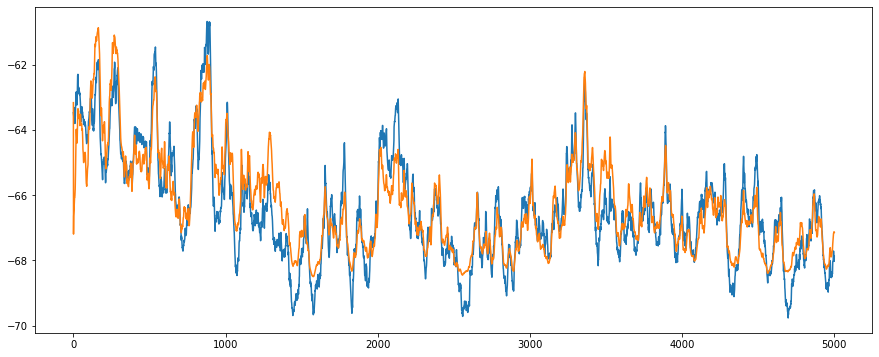

In [10]:
plt.figure(figsize = (15,6))
plt.plot(V[65000:80000][:5000])
plt.plot(test[:5000])

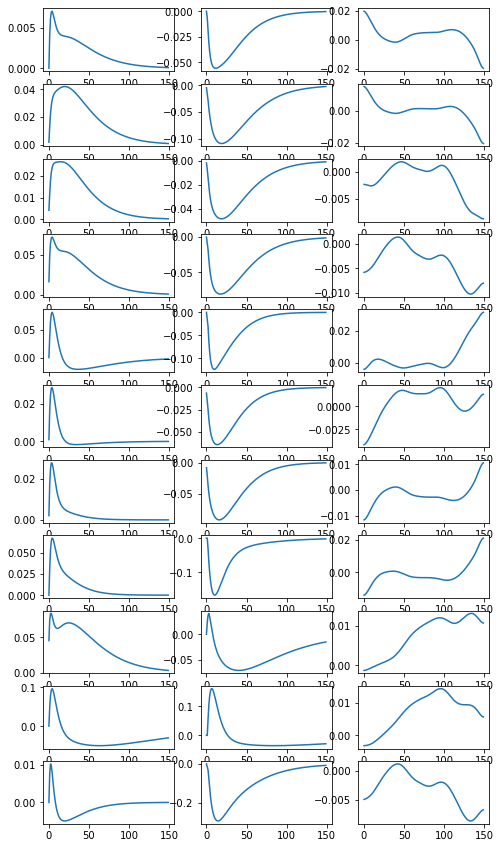

In [13]:
sub_no = 11

fig, axs = plt.subplots(nrows=sub_no, ncols=3, figsize = (8,15))
for i in range(sub_no):
    axs[i,0].plot(filters[i])
    axs[i,1].plot(filters[sub_no+i])
    axs[i,2].plot(filters[sub_no*2+i])